In [3]:
import numpy as np

from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers

In [4]:
(X_data, Y_labels), (_X_data, _Y_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 3s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/master/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/master/anaconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or s

In [10]:
word_index = imdb.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [14]:
for _ in X_data[0]:
    print(word_index.get(_ -3))

None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [16]:
def vectorize(sequences, dim=10000):
    results = np.zeros((len(sequences), dim))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

In [17]:
X_train = vectorize(X_data)
X_test = vectorize(_X_data)

In [21]:
X_train.shape, Y_test.shape

((25000, 10000), (25000,))

In [20]:
Y_train = np.asarray(Y_labels).astype('float32')
Y_test = np.asarray(_Y_labels).astype('float32')

In [22]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2021-09-01 15:58:43.319279: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-01 15:58:43.320450: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-01 15:58:43.324812: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [23]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

In [31]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = Y_train[:10000]
partial_y_train = Y_train[10000:]

In [32]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val)
)

2021-09-01 16:15:36.467483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-01 16:15:36.490235: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2901210000 Hz


Epoch 1/4
30/30 [==============================] - 2s 60ms/step - loss: 0.6007 - accuracy: 0.6980 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 2/4
30/30 [==============================] - 1s 33ms/step - loss: 0.3323 - accuracy: 0.9019 - val_loss: 0.3077 - val_accuracy: 0.8881
Epoch 3/4
30/30 [==============================] - 1s 43ms/step - loss: 0.2343 - accuracy: 0.9292 - val_loss: 0.2879 - val_accuracy: 0.8837
Epoch 4/4
30/30 [==============================] - 1s 32ms/step - loss: 0.1793 - accuracy: 0.9442 - val_loss: 0.3015 - val_accuracy: 0.8803


In [42]:
import matplotlib.pyplot as plt

def plot_history(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epoch = range(1, len(loss_values) + 1)

    plt.plot(epoch, loss_values, 'o', label='loss')
    plt.plot(epoch, val_loss_values, '--', label='val_loss')
    plt.legend()
    plt.show()

In [43]:
model.evaluate(X_test, Y_test)

782/782 [==============================] - 18s 23ms/step - loss: 0.3269 - accuracy: 0.8672


[0.3269495666027069, 0.8671600222587585]

### Modelo menos complejo

In [41]:
model_two = models.Sequential()
model_two.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_two.add(layers.Dense(16, activation='relu'))
model_two.add(layers.Dense(1, activation='sigmoid'))

model_two.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history_two = model_two.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.6272 - accuracy: 0.6616 - val_loss: 0.4842 - val_accuracy: 0.8570
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4223 - accuracy: 0.8864 - val_loss: 0.3674 - val_accuracy: 0.8732
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2991 - accuracy: 0.9148 - val_loss: 0.3049 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2265 - accuracy: 0.9339 - val_loss: 0.2821 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1801 - accuracy: 0.9506 - val_loss: 0.2828 - val_accuracy: 0.8872
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1481 - accuracy: 0.9573 - val_loss: 0.2752 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1286 - accuracy: 0.9650 - val_loss: 0.2813 - val_accuracy: 0.8881
Epoch 8/20
30

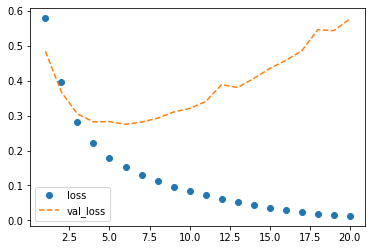

In [44]:
plot_history(history_two)

### Regularización

In [45]:
from tensorflow.keras import regularizers

In [48]:
model_reg = models.Sequential()
model_reg.add(layers.Dense(8, activation='relu', input_shape=(10000,), 
                           kernel_regularizer=regularizers.l2(0.001)))
model_reg.add(layers.Dense(4, activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)))
model_reg.add(layers.Dense(1, activation='sigmoid'))

model_reg.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history_three = model_reg.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6541 - accuracy: 0.6697 - val_loss: 0.5227 - val_accuracy: 0.8418
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4492 - accuracy: 0.8857 - val_loss: 0.4069 - val_accuracy: 0.8817
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3519 - accuracy: 0.9131 - val_loss: 0.3700 - val_accuracy: 0.8728
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2982 - accuracy: 0.9289 - val_loss: 0.3418 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2717 - accuracy: 0.9301 - val_loss: 0.3298 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2480 - accuracy: 0.9395 - val_loss: 0.3297 - val_accuracy: 0.8895
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2282 - accuracy: 0.9477 - val_loss: 0.3273 - val_accuracy: 0.8871
Epoch 8/20
30

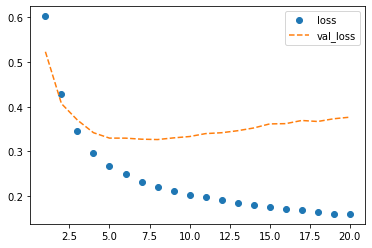

In [49]:
plot_history(history_three)

In [50]:
model_drop = models.Sequential()
model_drop.add(layers.Dense(8, activation='relu', input_shape=(10000,)))
model_drop.add(layers.Dropout(0.25))
model_drop.add(layers.Dense(4, activation='relu'))
model_drop.add(layers.Dropout(0.25))
model_drop.add(layers.Dense(1, activation='sigmoid'))

model_drop.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'
)

history_four = model_drop.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6496 - accuracy: 0.6174 - val_loss: 0.5437 - val_accuracy: 0.7576
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5410 - accuracy: 0.7490 - val_loss: 0.4648 - val_accuracy: 0.8488
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4762 - accuracy: 0.7924 - val_loss: 0.4239 - val_accuracy: 0.8729
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4286 - accuracy: 0.8299 - val_loss: 0.3811 - val_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3862 - accuracy: 0.8522 - val_loss: 0.3573 - val_accuracy: 0.8833
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3589 - accuracy: 0.8796 - val_loss: 0.3315 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3351 - accuracy: 0.8857 - val_loss: 0.3216 - val_accuracy: 0.8855
Epoch 8/20
30

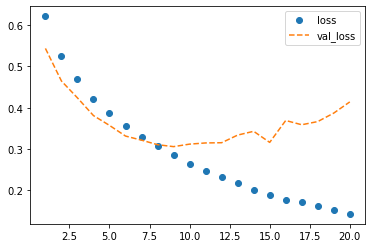

In [51]:
plot_history(history_four)